In [1]:
import pandas as pd
import numpy as np

from datetime import date

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import plotly.express as px

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

# Dataset
#### Se trata de un dataset de datos de pacientes a los que se les esta evaluando las causas de un derrame cerebral 

In [6]:
derrame = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [7]:
len(derrame)

5110

In [8]:
derrame.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
derrame

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Limpieza de datos

### Revision de valores nulos

In [10]:
null_summary = pd.DataFrame()

In [11]:
for c_ in derrame.columns:
    r_ = pd.DataFrame({
        "Column" : [c_],
        "NaFound" : [ np.sum( pd.isnull( derrame[c_] ) ) ],
        "Percentage" : [ np.sum( pd.isnull( derrame[c_] ) ) / derrame.shape[0] ]
        
    })
    null_summary = pd.concat( [ null_summary, r_ ] )

In [12]:
null_summary

,Column,NaFound,Percentage
0,id,0,0.000000
0,gender,0,0.000000
0,age,0,0.000000
0,hypertension,0,0.000000
0,heart_disease,0,0.000000
0,ever_married,0,0.000000
0,work_type,0,0.000000
0,Residence_type,0,0.000000
0,avg_glucose_level,0,0.000000
0,bmi,201,0.039335


#### Se han encontrado valores nulos unicamente en la columna [ bmi ]

In [13]:
avg_bmi = derrame["bmi"].mean()

In [14]:
avg_bmi

28.893236911794673

#### sustituiremos los valores nulos por la media

In [15]:
derrame.replace(np.nan, avg_bmi, inplace=True)

In [16]:
np.sum(derrame.isnull())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
derrame

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


#### como podemos ver, ahora ya no tenemos valores nulos.

### Revision de valores en cada columna

In [18]:
derrame.groupby(['gender'], as_index=False).count()

,gender,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994
1,Male,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115
2,Other,1,1,1,1,1,1,1,1,1,1,1


#### ese unico valor de Other se podria eliminar o sustituir

In [19]:
derrame = derrame.loc[ derrame['gender'] != "Other" , : ]

In [20]:
derrame.groupby(['gender'], as_index=False).count()

,gender,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994
1,Male,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115


#### creemos que un solo dato es insignificante, y con esto queda eliminado ese registro

In [21]:
derrame["age"].drop_duplicates()

0       67.00
1       61.00
2       80.00
3       49.00
4       79.00
        ...  
1614     0.08
1632     1.48
1975     0.56
2030     0.48
3618     0.16
Name: age, Length: 104, dtype: float64

#### al haber tantos valores distintos en [ age ] se pude crear otra columna donde esten en rangos, de 5 anios esta bien

In [22]:
def range_to_age(r):
    for i in range(5, 100, 5):
        if r['age'] <= i:
            r['age'] = i
            return r['age']

In [23]:
derrame['age_range'] = derrame.apply( lambda r: range_to_age(r), axis=1)

C:\Users\eduar\AppData\Local\Temp\ipykernel_26704\2296787635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  derrame['age_range'] = derrame.apply( lambda r: range_to_age(r), axis=1)


In [24]:
derrame.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,70
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,65
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,80
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,50
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,80


#### tenemos una nueva columna con rango de edades, donde el numero que se ve es el mayor desde 5 atras, es decir:
#### si tiene 10 es el rango (5 - 10), si tiene 45 es el rango (40 - 45) 

In [25]:
derrame.groupby(['hypertension'], as_index=False).count()

,hypertension,id,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,0,4611,4611,4611,4611,4611,4611,4611,4611,4611,4611,4611,4611
1,1,498,498,498,498,498,498,498,498,498,498,498,498


#### esta correcto, valor de 0 es para negativo y el valor de 1 es para positivo

In [26]:
derrame.groupby(['heart_disease'], as_index=False).count()

,heart_disease,id,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,0,4833,4833,4833,4833,4833,4833,4833,4833,4833,4833,4833,4833
1,1,276,276,276,276,276,276,276,276,276,276,276,276


#### esta correcto, 0 = negativo, 1 = positivo

In [27]:
derrame.groupby(['ever_married'], as_index=False).count()

,ever_married,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,No,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756,1756
1,Yes,3353,3353,3353,3353,3353,3353,3353,3353,3353,3353,3353,3353


#### se puede crear una nueva columna donde yes=1 y no=0, para tratar los valores numericamente

In [28]:
def to_change_married(r):
    if r['ever_married'] == "Yes" :
        r['ever_married'] = 1
        return r['ever_married']
    if r['ever_married'] == "No" :
        r['ever_married'] = 0
        return r['ever_married']

In [29]:
derrame['new_ever_married'] = derrame.apply( lambda r: to_change_married(r) , axis = 1)

C:\Users\eduar\AppData\Local\Temp\ipykernel_26704\337944335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  derrame['new_ever_married'] = derrame.apply( lambda r: to_change_married(r) , axis = 1)


In [30]:
derrame.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,new_ever_married
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,70,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,65,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,80,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,50,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,80,1


#### con esta nueva columna podremos tratar el estado de casado como un numero.

In [31]:
derrame.groupby(['work_type'], as_index=False).count()

,work_type,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,new_ever_married
0,Govt_job,657,657,657,657,657,657,657,657,657,657,657,657,657
1,Never_worked,22,22,22,22,22,22,22,22,22,22,22,22,22
2,Private,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924
3,Self-employed,819,819,819,819,819,819,819,819,819,819,819,819,819
4,children,687,687,687,687,687,687,687,687,687,687,687,687,687


#### igual, se pueden cambiar a valores numericos
#### daremos valores numericos a las categorias segun consideramos sea el trabajo mas exhaustivo o dificil, lo cual conlleva a mas carga para el cerebro.
#### siendo children=0, Never_worked=1, Govt_job=2, Self-employed=3, Private=4

In [32]:
def to_change_work(r):
    if r['work_type'] == "children" :
        r['work_type'] = 0
        return r['work_type']
    if r['work_type'] == "Never_worked" :
        r['work_type'] = 1
        return r['work_type']
    if r['work_type'] == "Govt_job" :
        r['work_type'] = 2
        return r['work_type']
    if r['work_type'] == "Self-employed" :
        r['work_type'] = 3
        return r['work_type']
    if r['work_type'] == "Private" :
        r['work_type'] = 4
        return r['work_type']

In [33]:
derrame['new_work'] = derrame.apply( lambda r: to_change_work(r), axis=1 )

C:\Users\eduar\AppData\Local\Temp\ipykernel_26704\2932751897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  derrame['new_work'] = derrame.apply( lambda r: to_change_work(r), axis=1 )


In [34]:
derrame.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,new_ever_married,new_work
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,70,1,4
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,65,1,3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,80,1,4
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,50,1,4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,80,1,3


#### listo, nueva columna con las categorias de trabajo en numeros

In [35]:
derrame.groupby(['Residence_type'], as_index=False).count()

,Residence_type,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,new_ever_married,new_work
0,Rural,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513
1,Urban,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596


#### igual, se pueden cambiar a valores numericos

In [36]:
def to_change_residence(r):
    if r['Residence_type'] == "Urban" :
        r['Residence_type'] = 1
        return r['Residence_type']
    if r['Residence_type'] == "Rural" :
        r['Residence_type'] = 0
        return r['Residence_type']

In [37]:
derrame['new_residence_type'] = derrame.apply( lambda r: to_change_residence(r), axis=1 )

C:\Users\eduar\AppData\Local\Temp\ipykernel_26704\693853122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  derrame['new_residence_type'] = derrame.apply( lambda r: to_change_residence(r), axis=1 )


In [38]:
derrame.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,new_ever_married,new_work,new_residence_type
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,70,1,4,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,65,1,3,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,80,1,4,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,50,1,4,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,80,1,3,0


#### hemos creado una nueva columna donde Rural = 0 y Urban = 1 para la columna Residence_type

In [39]:
derrame.groupby(['avg_glucose_level'], as_index=False).count()

,avg_glucose_level,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,age_range,new_ever_married,new_work,new_residence_type
0,55.12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,55.22,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,55.23,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,55.25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,55.26,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,266.59,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3974,267.60,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3975,267.61,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3976,267.76,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### esta correcto

In [40]:
derrame.groupby(['bmi'], as_index=False).count()

,bmi,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,age_range,new_ever_married,new_work,new_residence_type
0,10.3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,11.3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,11.5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,12.3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,66.8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
415,71.9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
416,78.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
417,92.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### tambien esta correcto

In [41]:
derrame.groupby(['smoking_status'], as_index=False).count()

,smoking_status,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,age_range,new_ever_married,new_work,new_residence_type
0,Unknown,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544
1,formerly smoked,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884
2,never smoked,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892
3,smokes,789,789,789,789,789,789,789,789,789,789,789,789,789,789,789


#### igual, se pueden cambiar a valores numericos

In [42]:
def to_change_smoking(r):
    if r['smoking_status'] == "Unknown":
        r['smoking_status'] = 0
        return r['smoking_status']
    if r['smoking_status'] == "never smoked" :
        r['smoking_status'] = 0
        return r['smoking_status']
    if r['smoking_status'] == "formerly smoked":
        r['smoking_status'] = 1
        return r['smoking_status']
    if r['smoking_status'] == "smokes" :
        r['smoking_status'] = 2
        return r['smoking_status']

In [43]:
derrame['new_smokes'] = derrame.apply( lambda r: to_change_smoking(r), axis=1)

C:\Users\eduar\AppData\Local\Temp\ipykernel_26704\3596805175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  derrame['new_smokes'] = derrame.apply( lambda r: to_change_smoking(r), axis=1)


In [44]:
derrame.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,new_ever_married,new_work,new_residence_type,new_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,70,1,4,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,65,1,3,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,80,1,4,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,50,1,4,1,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,80,1,3,0,0


#### consideramos que los valores para Unknown y never smoked sean de cero, pues no tienen significancia, pero si ha fumado o es fumador esto si tiene significanci y se ve reflejado en un valor numerico.

In [45]:
derrame.groupby(['stroke'], as_index=False).count()

,stroke,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_range,new_ever_married,new_work,new_residence_type,new_smokes
0,0,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860
1,1,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249


#### esta correcto

# El dataset esta relativamente(a nuestro criterio) limpio y listo

In [46]:
derrame

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,new_ever_married,new_work,new_residence_type,new_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,70,1,4,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,65,1,3,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,80,1,4,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,50,1,4,1,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,80,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,80,1,4,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,85,1,3,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,35,1,3,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,55,1,4,0,1


In [175]:
derrame.to_csv('datos_tratados.csv')

# Analizando dataset derrame

In [47]:
derrame.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_range,new_ever_married,new_work,new_residence_type,new_smokes
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.894508,0.048738,45.270112,0.656293,3.031709,0.508123,0.481895
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340,22.602231,0.474991,1.388428,0.499983,0.747428
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000,25.000000,0.000000,2.000000,0.000000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000,45.000000,1.000000,4.000000,1.000000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,65.000000,1.000000,4.000000,1.000000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,85.000000,1.000000,4.000000,1.000000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x22fbd264df0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbd27f490>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbd2599a0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbd27f970>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbd27fc40>],
 'means': []}

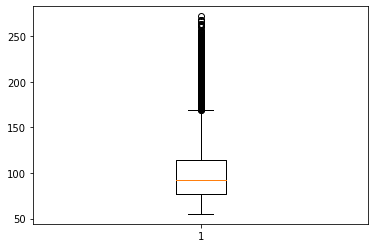

In [48]:
plt.boxplot(derrame["avg_glucose_level"])

In [49]:
d1 = derrame.groupby(["age_range"], as_index = False)["avg_glucose_level"].median()

<AxesSubplot:xlabel='age_range', ylabel='avg_glucose_level'>

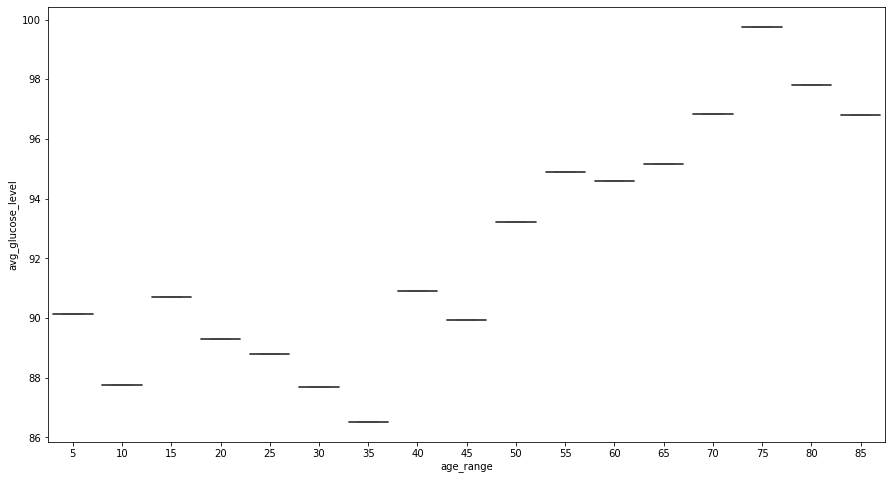

In [50]:
f, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(data=d1, x="age_range", y="avg_glucose_level")

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbd4dc340>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbd4dc8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbd4dc040>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbd4dce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbd4e9190>],
 'means': []}

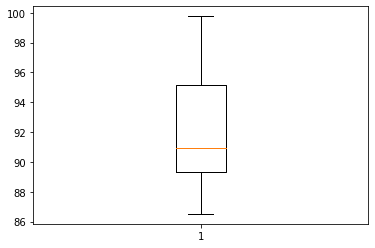

In [51]:
plt.boxplot(d1["avg_glucose_level"])

In [52]:
d2 = derrame.groupby(["age", "gender"], as_index = False)["avg_glucose_level"].median()

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbd53f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbd53ff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbd53f700>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbd54e550>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbd54e820>],
 'means': []}

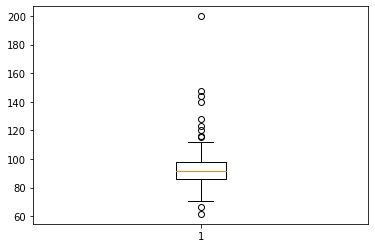

In [53]:
plt.boxplot(d2["avg_glucose_level"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbd5aaeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbd5ba490>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbd5aabe0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbd5baa60>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbd5bad30>],
 'means': []}

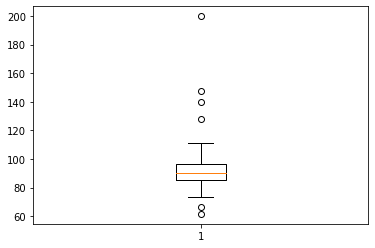

In [54]:
plt.boxplot(d2.loc[(d2["gender"] == "Female"), ["avg_glucose_level"]])

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbd615cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbd6242b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbd615a00>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbd624850>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbd624b20>],
 'means': []}

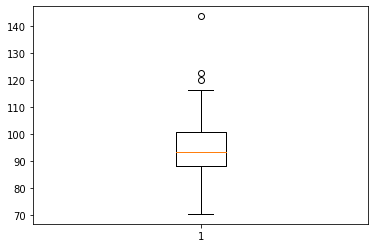

In [55]:
plt.boxplot(d2.loc[(d2["gender"] == "Male"), ["avg_glucose_level"]])

In [56]:
dt = derrame.loc[(derrame["smoking_status"] == "smokes") & (derrame["hypertension"] == 1), :]
dt2 = derrame.loc[(derrame["smoking_status"] == "smokes") & (derrame["hypertension"] == 0), :]

<AxesSubplot:xlabel='gender', ylabel='age'>

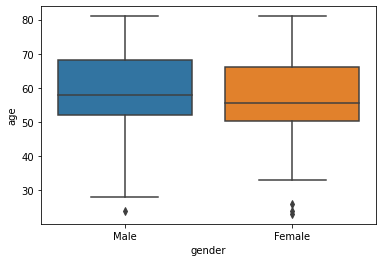

In [57]:
sns.boxplot(data=dt, x="gender", y="age")

<AxesSubplot:xlabel='gender', ylabel='age'>

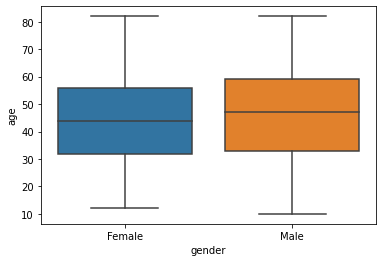

In [58]:
sns.boxplot(data=dt2, x="gender", y="age")

In [59]:
dt3 = derrame.loc[(derrame["smoking_status"] == "never smoked") & (derrame["hypertension"] == 1), :]
dt4 = derrame.loc[(derrame["smoking_status"] == "never smoked") & (derrame["hypertension"] == 0), :]

<AxesSubplot:xlabel='gender', ylabel='age'>

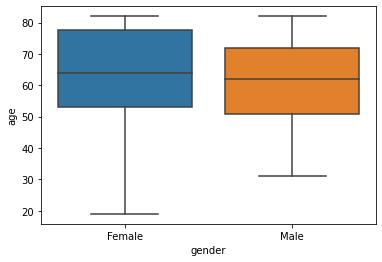

In [60]:
sns.boxplot(data=dt3, x="gender", y="age")

<AxesSubplot:xlabel='gender', ylabel='age'>

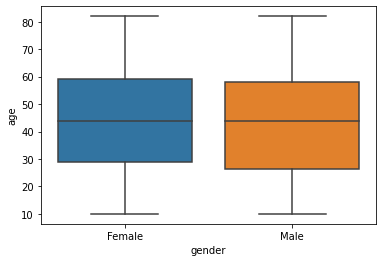

In [61]:
sns.boxplot(data=dt4, x="gender", y="age")

In [62]:
dt5 = derrame.loc[(derrame["hypertension"] == 1) & (derrame["heart_disease"] == 1), :]
dt6 = derrame.loc[(derrame["hypertension"] == 1) & (derrame["heart_disease"] == 0), :]

<AxesSubplot:xlabel='gender', ylabel='age'>

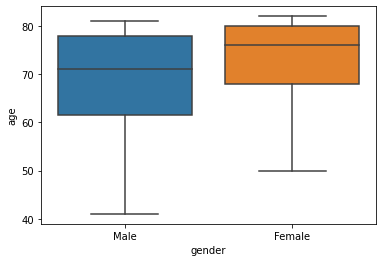

In [63]:
sns.boxplot(data=dt5, x="gender", y="age")

<AxesSubplot:xlabel='gender', ylabel='age'>

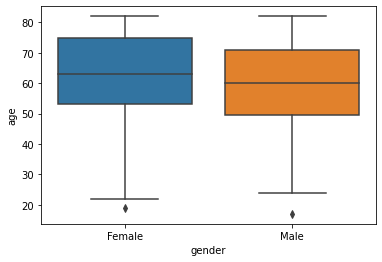

In [64]:
sns.boxplot(data=dt6, x="gender", y="age")

### analisis de valores atipicos a menores de 40, por genero y niveles de glucosa

In [65]:
menores40 = d2.loc[(d2["age"] < 40) , ["avg_glucose_level", "gender"]]

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

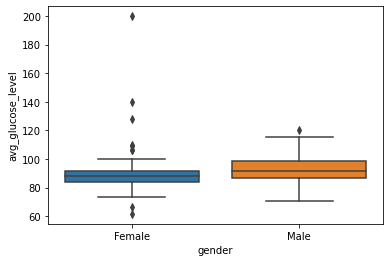

In [66]:
sns.boxplot(data=menores40, x="gender", y="avg_glucose_level")

In [67]:
FemMen40 = d2.loc[(d2["age"] < 40) & (d2["gender"] == "Female") , ["avg_glucose_level"]]

In [68]:
fem1 = np.quantile(FemMen40,0.25)
fem3 = np.quantile(FemMen40,0.75)

iqr = fem3 - fem1

In [69]:
upper_bound = fem3 - (1.5*iqr)
lower_bound = fem1 - (1.5*iqr)

In [70]:
fem_avg = FemMen40.loc[(FemMen40["avg_glucose_level"] < upper_bound) & (FemMen40["avg_glucose_level"] > lower_bound), :]

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbebd56a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbebd5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbebd53d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbebe3250>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbebe3520>],
 'means': []}

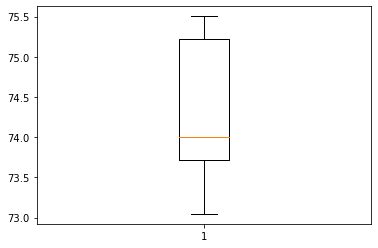

In [71]:
plt.boxplot(fem_avg)

# Revision de valores atipicos

### dataset derrame, solo las columnas con significancia

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbec36970>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbec36f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbec36670>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbec434f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbec437c0>],
 'means': []}

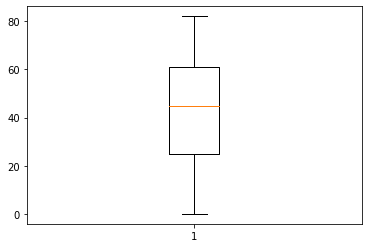

In [72]:
plt.boxplot( derrame['age'] )

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbec9b730>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbec9bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbec9b460>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbeca72e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbeca75b0>],
 'means': []}

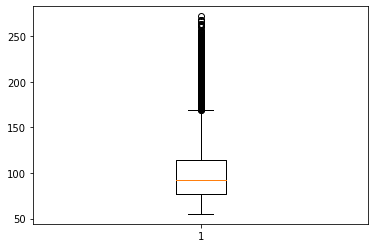

In [73]:
plt.boxplot( derrame['avg_glucose_level'] )

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbecfc520>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbecfcaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbecfc250>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbed090d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbed093a0>],
 'means': []}

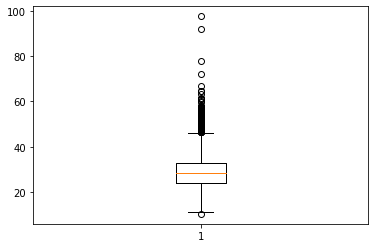

In [74]:
plt.boxplot( derrame['bmi'] )

### dataset derrame, valores atipicos para promedio de glucosa, por genero

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

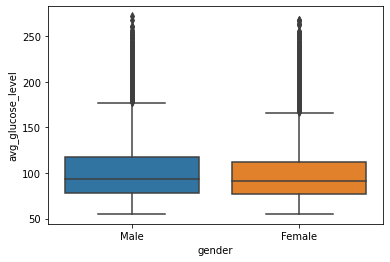

In [75]:
sns.boxplot( data=derrame  , x="gender" , y="avg_glucose_level" )

#### solo para el genero female

In [76]:
female_agl = derrame.loc[ derrame["gender"] == "Female" , ["avg_glucose_level"] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbedcebb0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbede0190>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbedce8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbede0760>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbede0a30>],
 'means': []}

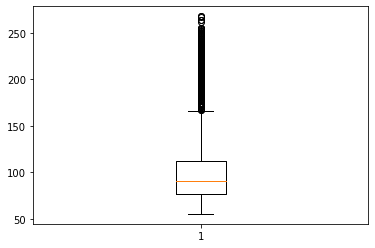

In [77]:
plt.boxplot(female_agl)

In [78]:
q1 = np.quantile( female_agl , 0.25 )
q3 = np.quantile( female_agl , 0.75 )

In [79]:
## Inter quartile range
iqr = q3 - q1

In [80]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [81]:
female_agl_2 = female_agl.loc[ (female_agl['avg_glucose_level'] < upper_bound) & (female_agl['avg_glucose_level'] > lower_bound) , : ]

{'whiskers': [<matplotlib.lines.Line2D at 0x22fbee4f2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x22fbee4f880>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fbee3ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fbee4fe20>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fbee5c130>],
 'means': []}

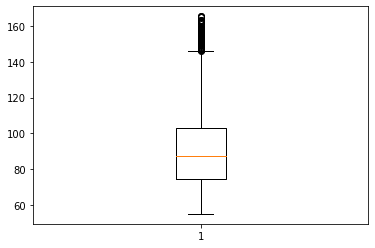

In [82]:
plt.boxplot(female_agl_2)

## analisis de correlacion en los datos, dataset derrame

In [83]:
c = derrame.corr()

In [84]:
c

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_range,new_ever_married,new_work,new_residence_type,new_smokes
id,1.000000,0.003677,0.003610,-0.001253,0.000943,0.003153,0.006430,0.003758,0.013944,0.018086,-0.001219,0.004801
age,0.003677,1.000000,0.276367,0.263777,0.238323,0.325858,0.245239,0.998033,0.679084,0.485291,0.014031,0.190800
hypertension,0.003610,0.276367,1.000000,0.108292,0.174540,0.160147,0.127891,0.275806,0.164187,0.091365,-0.007980,0.060059
heart_disease,-0.001253,0.263777,0.108292,1.000000,0.161907,0.038862,0.134905,0.264558,0.114601,0.068759,0.003045,0.076460
avg_glucose_level,0.000943,0.238323,0.174540,0.161907,1.000000,0.168910,0.131991,0.240139,0.155329,0.079232,-0.004783,0.051447
bmi,0.003153,0.325858,0.160147,0.038862,0.168910,1.000000,0.038912,0.324981,0.335563,0.383182,-0.000288,0.135678
stroke,0.006430,0.245239,0.127891,0.134905,0.131991,0.038912,1.000000,0.244867,0.108299,0.066857,0.015415,0.041366
age_range,0.003758,0.998033,0.275806,0.264558,0.240139,0.324981,0.244867,1.000000,0.677610,0.482331,0.013925,0.189530
new_ever_married,0.013944,0.679084,0.164187,0.114601,0.155329,0.335563,0.108299,0.677610,1.000000,0.432715,0.005988,0.188705
new_work,0.018086,0.485291,0.091365,0.068759,0.079232,0.383182,0.066857,0.482331,0.432715,1.000000,-0.009960,0.210143


#### se puede notar que no existe ninguna correlacion significante entre los datos

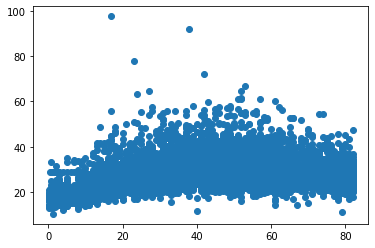

In [85]:
plt.scatter(derrame['age'], derrame['bmi'])

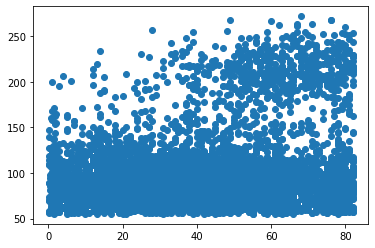

In [86]:
plt.scatter(derrame['age'], derrame['avg_glucose_level'])

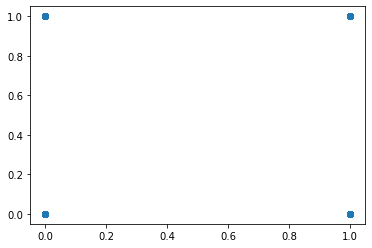

In [176]:
plt.scatter(derrame['stroke'], derrame['heart_disease'])

C:\Users\eduar\AppData\Local\Temp\ipykernel_26704\808831101.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(c, mask=np.zeros_like(c, dtype = np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

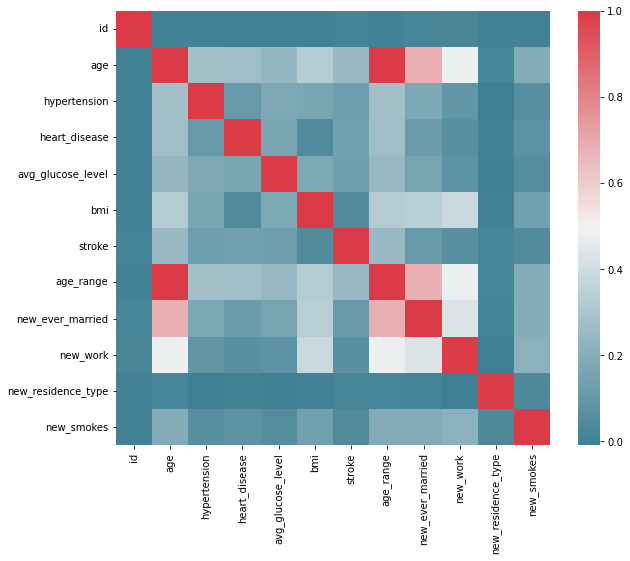

In [87]:
f, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(c, mask=np.zeros_like(c, dtype = np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

#### de nuevo esto nos muestra que no hay correlacion marcada entre los datos

## Principal Components Analisis

In [88]:
derrame.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_range,new_ever_married,new_work,new_residence_type,new_smokes
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.894508,0.048738,45.270112,0.656293,3.031709,0.508123,0.481895
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340,22.602231,0.474991,1.388428,0.499983,0.747428
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000,25.000000,0.000000,2.000000,0.000000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000,45.000000,1.000000,4.000000,1.000000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,65.000000,1.000000,4.000000,1.000000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,85.000000,1.000000,4.000000,1.000000,2.000000


In [89]:
derrame.head(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,new_ever_married,new_work,new_residence_type,new_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,70,1,4,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,65,1,3,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,80,1,4,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,50,1,4,1,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,80,1,3,0,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1,85,1,4,1,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,75,1,4,0,0


In [90]:
columns_to_use = [
    "age",
    "hypertension",
    "heart_disease",
    "avg_glucose_level",
    "bmi",
    "stroke",
    "new_ever_married",
    "new_work",
    "new_residence_type",
    "new_smokes"
]

In [91]:
x = derrame.loc[ : , columns_to_use].values

In [92]:
x

array([[67.,  0.,  1., ...,  4.,  1.,  1.],
       [61.,  0.,  0., ...,  3.,  0.,  0.],
       [80.,  0.,  1., ...,  4.,  0.,  0.],
       ...,
       [35.,  0.,  0., ...,  3.,  0.,  0.],
       [51.,  0.,  0., ...,  4.,  0.,  1.],
       [44.,  0.,  0., ...,  2.,  1.,  0.]])

### estandarizamos los datos

In [93]:
x = StandardScaler().fit_transform(x)

In [94]:
x

array([[ 1.05124201, -0.32863749,  4.18459909, ...,  0.69746916,
         0.983884  ,  0.69325231],
       [ 0.78588869, -0.32863749, -0.23897152, ..., -0.02284011,
        -1.01637997, -0.6448006 ],
       [ 1.6261742 , -0.32863749,  4.18459909, ...,  0.69746916,
        -1.01637997, -0.6448006 ],
       ...,
       [-0.3639757 , -0.32863749, -0.23897152, ..., -0.02284011,
        -1.01637997, -0.6448006 ],
       [ 0.34363316, -0.32863749, -0.23897152, ...,  0.69746916,
        -1.01637997,  0.69325231],
       [ 0.03405428, -0.32863749, -0.23897152, ..., -0.74314937,
         0.983884  , -0.6448006 ]])

In [95]:
pca = PCA( n_components=2 )

In [96]:
principalComponents = pca.fit_transform(x)

In [97]:
principalComponents

array([[ 3.84132098,  4.30160783],
       [ 1.76014063,  2.77215661],
       [ 3.02531066,  3.59614127],
       ...,
       [-0.21199992, -0.60746311],
       [ 0.92905223, -0.18552907],
       [-0.47272902, -0.15329714]])

In [98]:
pcadf = pd.DataFrame(data=principalComponents, columns=['c1','c2'] )

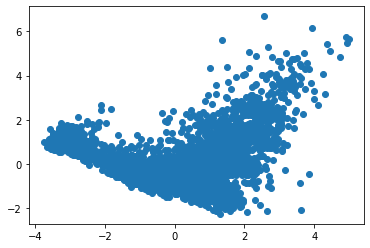

In [99]:
plt.scatter( pcadf['c1'], pcadf['c2'])

In [100]:
km = KMeans( n_clusters=3 ).fit(pcadf)

In [101]:
cetroids = km.cluster_centers_

In [102]:
cetroids

array([[ 0.3296135 , -0.66745098],
       [-2.50396998,  0.57857576],
       [ 1.95915482,  1.47105682]])

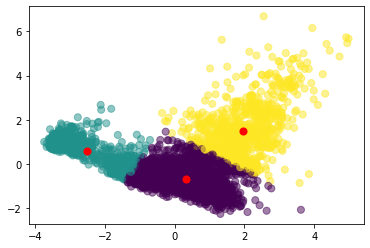

In [103]:
plt.scatter( pcadf['c1'], pcadf['c2'], c=km.labels_.astype(float), s=50, alpha=0.5 )
plt.scatter( [ cetroids[0][0], cetroids[1][0], cetroids[2][0] ], [ cetroids[0][1], cetroids[1][1], cetroids[2][1] ], c='red', s=50)

In [104]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [105]:
loadings

array([[ 0.85116928,  0.03173072],
       [ 0.39372628,  0.3692483 ],
       [ 0.32207745,  0.51569732],
       [ 0.37957767,  0.45670163],
       [ 0.57745651, -0.29094233],
       [ 0.30168289,  0.52360492],
       [ 0.76959674, -0.20063846],
       [ 0.66964373, -0.40217847],
       [ 0.01230815,  0.00511237],
       [ 0.35368652, -0.22090529]])

In [106]:
pca.components_

array([[ 0.51631185,  0.23883092,  0.19536937,  0.23024849,  0.35028007,
         0.18299821,  0.46683066,  0.40620003,  0.00746601,  0.21454315],
       [ 0.02870989,  0.33409509,  0.46660186,  0.41322269, -0.26324401,
         0.47375664, -0.18153726, -0.36389025,  0.00462566, -0.19987465]])

In [107]:
derrame_n = derrame.loc[ : , ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke", "new_ever_married"
                             , "new_work", "new_residence_type", "new_smokes"] ]

In [108]:
derrame_n.head(7)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,new_ever_married,new_work,new_residence_type,new_smokes
0,67.0,0,1,228.69,36.600000,1,1,4,1,1
1,61.0,0,0,202.21,28.893237,1,1,3,0,0
2,80.0,0,1,105.92,32.500000,1,1,4,0,0
3,49.0,0,0,171.23,34.400000,1,1,4,1,2
4,79.0,1,0,174.12,24.000000,1,1,3,0,0
5,81.0,0,0,186.21,29.000000,1,1,4,1,1
6,74.0,1,1,70.09,27.400000,1,1,4,0,0


In [109]:
derrame_n['cluster'] = km.labels_

In [110]:
derrame_n.head(7)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,new_ever_married,new_work,new_residence_type,new_smokes,cluster
0,67.0,0,1,228.69,36.600000,1,1,4,1,1,2
1,61.0,0,0,202.21,28.893237,1,1,3,0,0,2
2,80.0,0,1,105.92,32.500000,1,1,4,0,0,2
3,49.0,0,0,171.23,34.400000,1,1,4,1,2,2
4,79.0,1,0,174.12,24.000000,1,1,3,0,0,2
5,81.0,0,0,186.21,29.000000,1,1,4,1,1,2
6,74.0,1,1,70.09,27.400000,1,1,4,0,0,2


In [111]:
derrame_n.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,new_ever_married,new_work,new_residence_type,new_smokes,cluster
age,1.000000,0.276367,0.263777,0.238323,0.325858,0.245239,0.679084,0.485291,0.014031,0.190800,0.100148
hypertension,0.276367,1.000000,0.108292,0.174540,0.160147,0.127891,0.164187,0.091365,-0.007980,0.060059,0.439367
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038862,0.134905,0.114601,0.068759,0.003045,0.076460,0.431586
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168910,0.131991,0.155329,0.079232,-0.004783,0.051447,0.400262
bmi,0.325858,0.160147,0.038862,0.168910,1.000000,0.038912,0.335563,0.383182,-0.000288,0.135678,-0.108642
stroke,0.245239,0.127891,0.134905,0.131991,0.038912,1.000000,0.108299,0.066857,0.015415,0.041366,0.407512
new_ever_married,0.679084,0.164187,0.114601,0.155329,0.335563,0.108299,1.000000,0.432715,0.005988,0.188705,-0.121978
new_work,0.485291,0.091365,0.068759,0.079232,0.383182,0.066857,0.432715,1.000000,-0.009960,0.210143,-0.213345
new_residence_type,0.014031,-0.007980,0.003045,-0.004783,-0.000288,0.015415,0.005988,-0.009960,1.000000,0.030385,-0.004966
new_smokes,0.190800,0.060059,0.076460,0.051447,0.135678,0.041366,0.188705,0.210143,0.030385,1.000000,-0.084664


In [173]:
fig = px.scatter(principalComponents, x=0, y=1, color=derrame_n['cluster'])

In [177]:
for i, feature in enumerate(columns_to_use):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

## conclusiones
#### 1. se puede ver una correlacion entre los casados y la masa corporal(es decir los casados aumentan su masa corporal... )
#### 2. la hypertension esta mas presente en los que tienen niveles de glucosa alto
#### 3. hay una muy estrecha relacion entre los que padecen un ataque al corazon con los que padecieron el derrame...
#### 4. la edad parece  no tener ninguna relacion significante

## Regresion Lineal
### buscaremos una regresion entre el bmi y el promedio de glucosa, por eso trataremos de hacer la prediccion para esas variables.

In [114]:
x = derrame.loc[ : , ['bmi']].values
y = derrame.loc[ : , 'avg_glucose_level'].values

In [115]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split( x, y, test_size=.3, random_state=0 )

In [116]:
np.mean(y)

106.14039929536114

In [117]:
np.mean(Y_Train)

105.91801174496645

In [118]:
np.mean(Y_Test)

106.65915851272015

In [119]:
regression = LinearRegression()
regression.fit( X_Train , Y_Train )

LinearRegression()

In [120]:
Y_Test

array([144.9 , 106.22,  72.63, ..., 101.13,  73.81, 221.43])

In [121]:
Y_Predic = regression.predict( X_Test )

In [122]:
Y_Predic

array([103.59102736,  93.96188079, 143.69592649, ..., 120.96319901,
        97.03923691, 109.64647005])

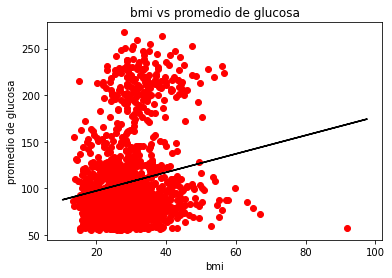

In [123]:
viz_train = plt
viz_train.scatter(X_Test, Y_Test, color = 'red')
viz_train.plot(X_Train,regression.predict(X_Train), color = 'black')
viz_train.title('bmi vs promedio de glucosa')
viz_train.xlabel("bmi")
viz_train.ylabel("promedio de glucosa")
viz_train.show()

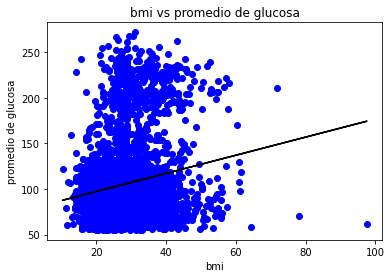

In [124]:
viz_train = plt
viz_train.scatter(X_Train, Y_Train, color = 'blue')
viz_train.plot(X_Train,regression.predict(X_Train), color = 'black')
viz_train.title('bmi vs promedio de glucosa')
viz_train.xlabel("bmi")
viz_train.ylabel("promedio de glucosa")
viz_train.show()

In [125]:
regression.intercept_

77.38386556016519

In [126]:
regression.coef_[0]

0.9926955228853449

## analisis de valores atipicos generalizado, para bmi por genero

<AxesSubplot:xlabel='gender', ylabel='bmi'>

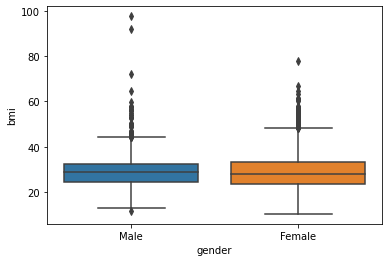

In [127]:
sns.boxplot( data=derrame  , x="gender" , y="bmi" )

#### los agrupamos por zona de residencia y genero, analizando el bmi

In [128]:
dfq1 = derrame.loc[ : , ["Residence_type","gender","bmi"] ].groupby( ["Residence_type","gender"] , as_index = False ).quantile(0.25)
dfq1.columns = ["Residence_type","gender", "bmi_q1"]

In [129]:
dfq3 = derrame.loc[ : , ["Residence_type","gender","bmi"] ].groupby( ["Residence_type","gender"] , as_index = False ).quantile(0.75)
dfq3.columns = ["Residence_type","gender", "bmi_q3"]

In [130]:
dfq2 = derrame.loc[ : , ["Residence_type","gender","bmi"] ].groupby( ["Residence_type","gender"] , as_index = False ).mean()
dfq2.columns = ["Residence_type","gender", "bmi_q2"]

In [131]:
df_iqr = dfq1.merge( dfq3 , on=["Residence_type","gender"] , how="inner" ).merge( dfq2 , on=["Residence_type","gender"] , how="inner" )

In [132]:
df_iqr.head(10)

,Residence_type,gender,bmi_q1,bmi_q3,bmi_q2
0,Rural,Female,23.5,33.1,29.039528
1,Rural,Male,24.2,32.2,28.697184
2,Urban,Female,23.4,33.5,29.079944
3,Urban,Male,24.3,32.3,28.623475


In [133]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["bmi_q3"] - r["bmi_q1"] , axis = 1)

In [134]:
df_iqr.head(3)

,Residence_type,gender,bmi_q1,bmi_q3,bmi_q2,iqr
0,Rural,Female,23.5,33.1,29.039528,9.6
1,Rural,Male,24.2,32.2,28.697184,8.0
2,Urban,Female,23.4,33.5,29.079944,10.1


In [135]:
df_iqr["upper"] = df_iqr.apply( lambda r: ( r["bmi_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["bmi_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [136]:
df_iqr.head(3)

,Residence_type,gender,bmi_q1,bmi_q3,bmi_q2,iqr,upper,lower
0,Rural,Female,23.5,33.1,29.039528,9.6,47.50,9.10
1,Rural,Male,24.2,32.2,28.697184,8.0,44.20,12.20
2,Urban,Female,23.4,33.5,29.079944,10.1,48.65,8.25


In [137]:
df_t = derrame.merge( df_iqr , on=["Residence_type","gender"] , how="left" ).copy()

In [138]:
df_t.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,new_ever_married,new_work,new_residence_type,new_smokes,bmi_q1,bmi_q3,bmi_q2,iqr,upper,lower
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,1,4,1,1,24.3,32.3,28.623475,8.0,44.30,12.30
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,1,3,0,0,23.5,33.1,29.039528,9.6,47.50,9.10
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,1,4,0,0,24.2,32.2,28.697184,8.0,44.20,12.20
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,1,4,1,2,23.4,33.5,29.079944,10.1,48.65,8.25
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,1,3,0,0,23.5,33.1,29.039528,9.6,47.50,9.10
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,...,1,4,1,1,24.3,32.3,28.623475,8.0,44.30,12.30
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,...,1,4,0,0,24.2,32.2,28.697184,8.0,44.20,12.20
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,...,0,4,1,0,23.4,33.5,29.079944,10.1,48.65,8.25
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,...,1,4,0,0,23.5,33.1,29.039528,9.6,47.50,9.10
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,...,1,4,1,0,23.4,33.5,29.079944,10.1,48.65,8.25


In [139]:
def getRealBmi(r):
    if ( r["bmi"] <= r["lower"] ) | ( r["bmi"] >= r["upper"] ):
        return r["bmi_q2"]
    else:
        return r["bmi"]

In [140]:
df_t.apply( lambda r: getRealBmi(r) , axis = 1 )

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5104    28.893237
5105    40.000000
5106    30.600000
5107    25.600000
5108    26.200000
Length: 5109, dtype: float64

In [141]:
df_t["new_bmi"] = df_t.apply( lambda r: getRealBmi(r) , axis = 1 )

#### nos queda un nuevo dataframe con el bmi antiguo y el nuevo bmi

In [142]:
df_t.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,new_work,new_residence_type,new_smokes,bmi_q1,bmi_q3,bmi_q2,iqr,upper,lower,new_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,4,1,1,24.3,32.3,28.623475,8.0,44.30,12.30,36.600000
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,3,0,0,23.5,33.1,29.039528,9.6,47.50,9.10,28.893237
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,4,0,0,24.2,32.2,28.697184,8.0,44.20,12.20,32.500000
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,4,1,2,23.4,33.5,29.079944,10.1,48.65,8.25,34.400000
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,3,0,0,23.5,33.1,29.039528,9.6,47.50,9.10,24.000000
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,...,4,1,1,24.3,32.3,28.623475,8.0,44.30,12.30,29.000000
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,...,4,0,0,24.2,32.2,28.697184,8.0,44.20,12.20,27.400000
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,...,4,1,0,23.4,33.5,29.079944,10.1,48.65,8.25,22.800000
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,...,4,0,0,23.5,33.1,29.039528,9.6,47.50,9.10,28.893237
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,...,4,1,0,23.4,33.5,29.079944,10.1,48.65,8.25,24.200000


#### Comparacion

<AxesSubplot:xlabel='gender', ylabel='bmi'>

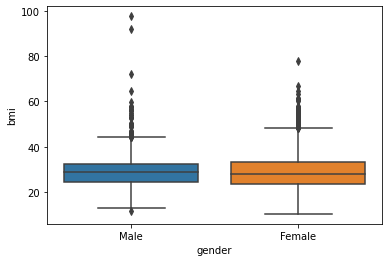

In [143]:
sns.boxplot( data=df_t  , x="gender" , y="bmi" )

<AxesSubplot:xlabel='gender', ylabel='new_bmi'>

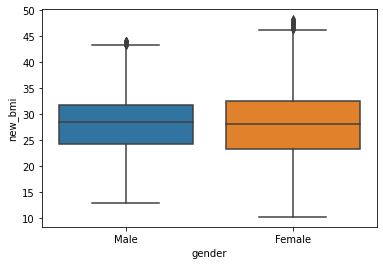

In [144]:
sns.boxplot( data=df_t  , x="gender" , y="new_bmi" )

#### pequena conclusion: los valores se trataron pero no se limpiaron del todo, para no comprometer la integridad de los datos

<AxesSubplot:xlabel='Residence_type', ylabel='new_bmi'>

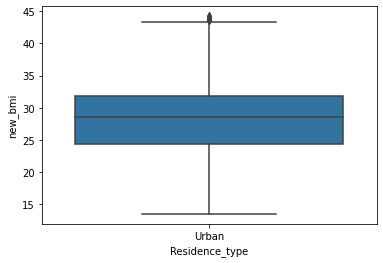

In [145]:
sns.boxplot( data=df_t.loc[ (df_t['gender'] == 'Male') & (df_t['Residence_type'] == "Urban") , : ]  , x="Residence_type" , y="new_bmi" )

<AxesSubplot:xlabel='Residence_type', ylabel='bmi'>

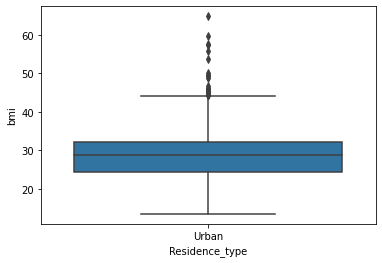

In [146]:
sns.boxplot( data=df_t.loc[ (df_t['gender'] == 'Male') & (df_t['Residence_type'] == "Urban") , : ]  , x="Residence_type" , y="bmi" )

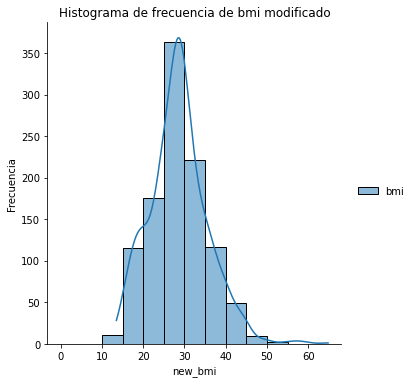

In [147]:
frecuencia = range(0 , 60, 5)

sns.displot( df_t.loc[(df_t['gender'] == 'Male') & (df_t['Residence_type'] == "Urban") , ['bmi']  ] ,
            color='#F2AB6A', bins=frecuencia, kde=True)

plt.ylabel('Frecuencia')
plt.xlabel('new_bmi')
plt.title('Histograma de frecuencia de bmi modificado')

plt.show()

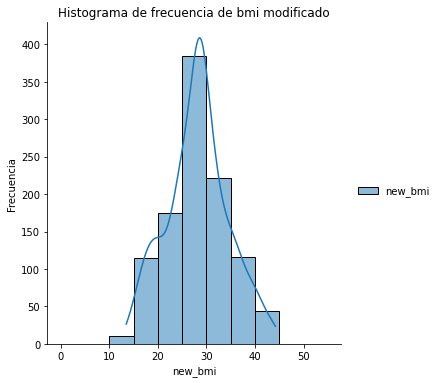

In [148]:
frecuencia = range(0 , 60, 5)

sns.displot( df_t.loc[(df_t['gender'] == 'Male') & (df_t['Residence_type'] == "Urban") , ['new_bmi']  ] ,
            color='#F2AB6A', bins=frecuencia, kde=True)

plt.ylabel('Frecuencia')
plt.xlabel('new_bmi')
plt.title('Histograma de frecuencia de bmi modificado')

plt.show()

#### ahora probemos la regresion lineal con el nuevo bmi

In [149]:
a = df_t.loc[ : , ["new_bmi"] ].values
b = df_t.loc[ : , "avg_glucose_level"].values

In [150]:
x_Train, x_Test, y_Train, y_Test = train_test_split( a, b, test_size=.3, random_state=0 )

In [151]:
regression2 = LinearRegression()
regression2.fit( x_Train , y_Train )

LinearRegression()

In [152]:
y_Test

array([144.9 , 106.22,  72.63, ..., 101.13,  73.81, 221.43])

In [153]:
y_Predic = regression2.predict( x_Test )

In [154]:
y_Predic

array([103.93647528,  92.97575481, 106.91906638, ..., 123.71097099,
        96.47866547, 110.8292995 ])

In [155]:
Y_Predic

array([103.59102736,  93.96188079, 143.69592649, ..., 120.96319901,
        97.03923691, 109.64647005])

### el resultado como podemos ver, y_Predic es para bmi nuevo and Y_Predic es para el bmi antiguo

#### hay una pequenia diferencia, es el nuevo bmi un poco mas acertado, pero no deja de fallar y el antiguo gana en otras

# Ahora realizaremos entrenamientos de machine learning supervisado

## Empezaremos con la regresion logistica
### primero veamos el dataset que esta limpio

In [156]:
derrame

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,new_ever_married,new_work,new_residence_type,new_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,70,1,4,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,65,1,3,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,80,1,4,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,50,1,4,1,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,80,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,80,1,4,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,85,1,3,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,35,1,3,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,55,1,4,0,1


In [194]:
features_col = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "new_ever_married"
                 , "new_work", "new_residence_type", "new_smokes"]

In [195]:
features_col

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'new_ever_married',
 'new_work',
 'new_residence_type',
 'new_smokes']

#### estas son las columnas que consideramos como variasbles para la prediccion de la variable stroke, que es la variable central de todo el dataset, ya que nos indica si la persona padecio o no el derrame cerebral.

In [196]:
X = derrame[features_col].values
y = derrame["stroke"].values

In [197]:
len(X)
len(y)

5109

In [472]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [473]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [474]:
y_pred  = log_model.predict(X_test)

In [475]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [476]:
Y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [477]:
print(len(Y_test))
print(len(y_pred))

1278
1278


In [478]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

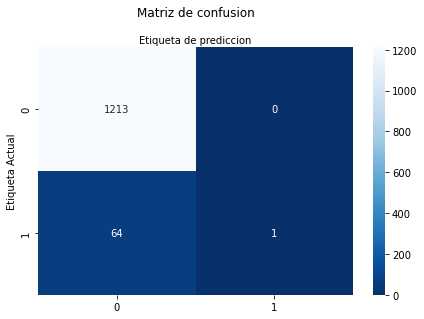

In [479]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [480]:
print(metrics.accuracy_score(Y_test,y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.9499217527386542
1.0
0.015384615384615385
0.030303030303030307


In [481]:
metrics.roc_auc_score(Y_test, y_pred)

0.5076923076923077

#### resultados un tanto interesantes, pues el accuracy es casi de 100%, y la precision es practicamente perfecta, pero el recall y f1score son practicamente cero
#### vemos que de todos los datos que eran unos pudo predecir solo uno, lo cual dice que el modelo no sirve, pero creemos que se debe a la gran cantidad de ceros en el dataset original, como vemos abajo, lo que proporcionalmente provoca que se de tanto error al predecir los ceros

In [482]:
derrame.groupby('stroke', as_index=1).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_range,new_ever_married,new_work,new_residence_type,new_smokes
stroke,,,,,,,,,,,,,,,,
0,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860,4860
1,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249


## Neuronal Network

In [483]:
# Making the Neural Network Classifier
NN = MLPClassifier(random_state=1, max_iter=1000)

# Training the model on the training data and labels
NN.fit(X_train, Y_train)

# Testing the model i.e. predicting the labels of the test data.
y_pred_NN = NN.predict(X_test)

# Evaluating the results of the model
accuracy = accuracy_score(Y_test,y_pred_NN)*100
confusion_mat = confusion_matrix(Y_test,y_pred_NN)

In [484]:
print(metrics.accuracy_score(Y_test,y_pred_NN))
print(precision_score(Y_test, y_pred_NN))
print(recall_score(Y_test, y_pred_NN))
print(f1_score(Y_test, y_pred_NN))

0.9491392801251957
0.0
0.0
0.0


C:\Users\eduar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [485]:
metrics.roc_auc_score(Y_test, y_pred_NN)

0.5

In [486]:
cnf_matrix_NN = metrics.confusion_matrix(Y_test, y_pred_NN)

Text(0.5, 257.44, 'Etiqueta de prediccion')

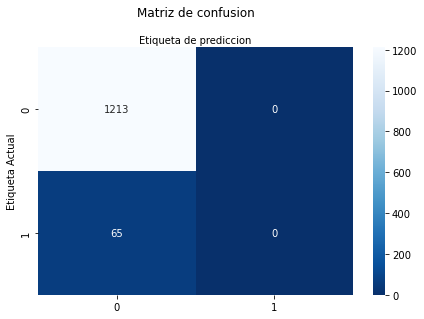

In [487]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_NN), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

## Arbol de desiciones

In [488]:
tree_one = tree.DecisionTreeClassifier(random_state=1)

In [489]:
tree_one = tree_one.fit( X_train , Y_train )

In [490]:
tree_one.tree_.max_depth

20

In [491]:
y_pred_T = tree_one.predict(X_test)

In [492]:
print(metrics.accuracy_score(Y_test,y_pred_T))
print(precision_score(Y_test, y_pred_T))
print(recall_score(Y_test, y_pred_T))
print(f1_score(Y_test, y_pred_T))

0.9076682316118936
0.14666666666666667
0.16923076923076924
0.15714285714285714


In [493]:
metrics.roc_auc_score(Y_test, y_pred_T)

0.5582345107489378

In [494]:
cnf_matrix_T = metrics.confusion_matrix(Y_test, y_pred_T)

Text(0.5, 257.44, 'Etiqueta de prediccion')

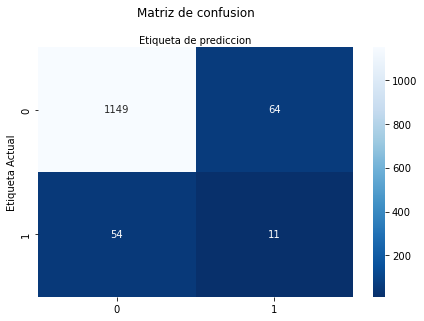

In [495]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_T), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

## Random forest

In [496]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(X_train , Y_train);

In [512]:
y_pred_RF = rf.predict(X_test) >= 0.1

In [513]:
print(metrics.accuracy_score(Y_test,y_pred_RF))
print(precision_score(Y_test, y_pred_RF))
print(recall_score(Y_test, y_pred_RF))
print(f1_score(Y_test, y_pred_RF))

0.8176838810641628
0.1557377049180328
0.5846153846153846
0.24595469255663435


In [514]:
metrics.roc_auc_score(Y_test, y_pred_RF)

0.7073942545500667

In [515]:
cnf_matrix_RF = metrics.confusion_matrix(Y_test, y_pred_RF)

Text(0.5, 257.44, 'Etiqueta de prediccion')

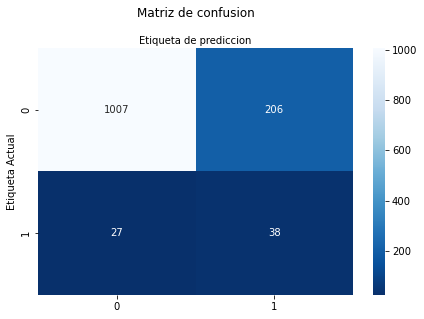

In [516]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")